In [91]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [92]:
def load_data_from_file(fileName = "data/advertising.csv"):
    data = np.genfromtxt(fileName, dtype = None, delimiter = ',', skip_header = 1)
    features_X = data[:, :3]
    sales_Y = data[:,3]
    ones_column = np.ones((features_X.shape[0], 1)) 
    features_X = np.hstack((ones_column, features_X)) 
    return features_X, sales_Y

In [93]:
#test 
features_X, sales_Y = load_data_from_file()
print(features_X[:5,:])
print(sales_Y.shape)

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]
(200,)


In [96]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound
    
def create_individual(n = 4, bound = 10):
    individual = [generate_random_value(bound) for _ in range(n)]
    return individual

In [97]:
#test
individual = create_individual()
print(individual)


[-3.7950523595689623, 2.703059613553831, 1.9267865719281152, 3.8870011539128315]


In [89]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss
def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 0
    if loss+1 != 0:
        return 1/(loss+1)
    return fitness_value


In [90]:
#test
features_X, sales_Y = load_data_from_file()
individual = [4.09 , 4.82 , 3.10 , 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [98]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
    return individual1_new, individual2_new
    

In [99]:
#test
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


In [100]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()

    return individual_m

In [101]:
#test
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(before_individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [102]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [103]:
population = initializePopulation(100)
print(len(population))

100


In [104]:
def selection(sorted_old_population, m = 100):
    index1 =  random.randint(0,m-1)
    while True:
        index2 = random.randint(0,m-1)
        if index2 != index1:
            break
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    return individual_s

In [111]:
#using Elitist algorithms 
'''
Trong quá trình tiến hóa, các phép lai ghép và đột biến có thể vô tình loại bỏ những cá thể tốt nhất
==> Điều này dẫn đến việc giảm chất lượng của quần thể, làm chậm hoặc thậm chí ngăn cản việc hội tụ đến lời giải tối ưu.
Thuật toán elitist đảm bảo rằng một số lượng nhất định các cá thể tốt nhất (ví dụ: 1 hoặc 2 cá thể) sẽ được giữ nguyên và trực tiếp chuyển sang thế hệ tiếp theo.
'''
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # selection
        individual_s1 = selection(sorted_population, m)
        individual_s2 = selection(sorted_population, m)

        # crossover
        individual1, individual2 = crossover(individual_s1, individual_s2)
        # mutation
        individual1_m = mutate(individual1)
        individual2_m = mutate(individual2)
        
        new_population.append(individual1_m)
        new_population.append(individual2_m)

        # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind) 


    return new_population, compute_loss(sorted_population[m-1])

        
        

In [112]:
#test
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [113]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):
      population, loss = create_new_population(population, elitism=2, gen=1)
      losses_list.append(loss)
  return losses_list
    

Best loss: 36.41316827936264 with chromsome:  [0.9166231533017521, 0.0294327683837059, 0.4019178980593896, 0.07799693909820049]
Best loss: 36.41316827936264 with chromsome:  [0.9166231533017521, 0.0294327683837059, 0.4019178980593896, 0.07799693909820049]
Best loss: 36.41316827936264 with chromsome:  [0.9166231533017521, 0.0294327683837059, 0.4019178980593896, 0.07799693909820049]
Best loss: 22.362219733918486 with chromsome:  [0.9166231533017521, 0.0294327683837059, 0.18546485228295495, 0.07799693909820049]
Best loss: 22.362219733918486 with chromsome:  [0.9166231533017521, 0.0294327683837059, 0.18546485228295495, 0.07799693909820049]
Best loss: 22.362219733918486 with chromsome:  [0.9166231533017521, 0.0294327683837059, 0.18546485228295495, 0.07799693909820049]
Best loss: 22.362219733918486 with chromsome:  [0.9166231533017521, 0.0294327683837059, 0.18546485228295495, 0.07799693909820049]
Best loss: 22.362219733918486 with chromsome:  [0.9166231533017521, 0.0294327683837059, 0.185464

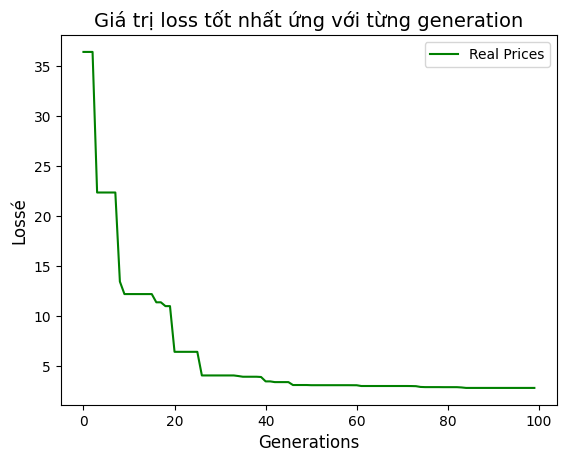

In [118]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):             
    plt.xlabel("Generations", fontsize=12)
    plt.ylabel("Lossé", fontsize=12)
    plt.title("Giá trị loss tốt nhất ứng với từng generation", fontsize=14)
    plt.plot(losses_list, c='green', label='Real Prices')
    plt.legend()
    plt.show()
    

losses_list = run_GA()
visualize_loss(losses_list)

[-1.9248971680299076, 0.4260693176898589, -0.6987399673102779, -0.5340548489006336]


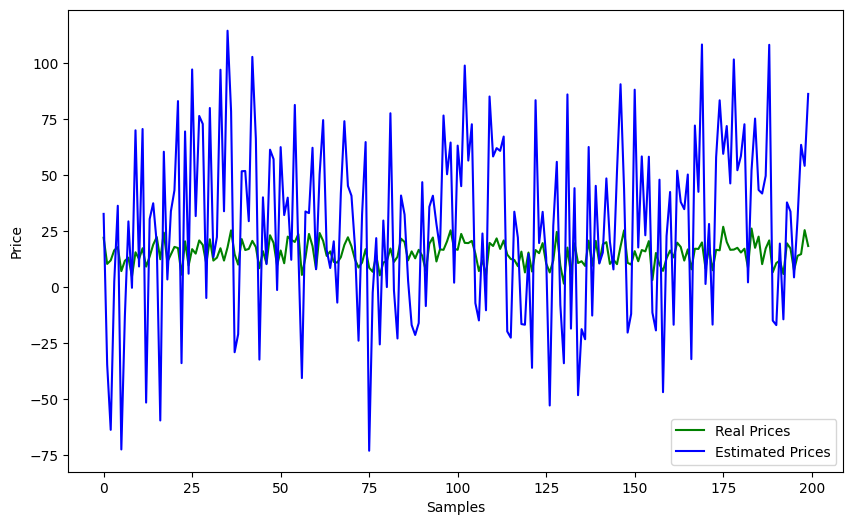

In [119]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
      predict_price = theta.dot(feature)
      estimated_prices.append(predict_price)
      
      

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()

[-1.9248971680299076, 0.4260693176898589, -0.6987399673102779, -0.5340548489006336]


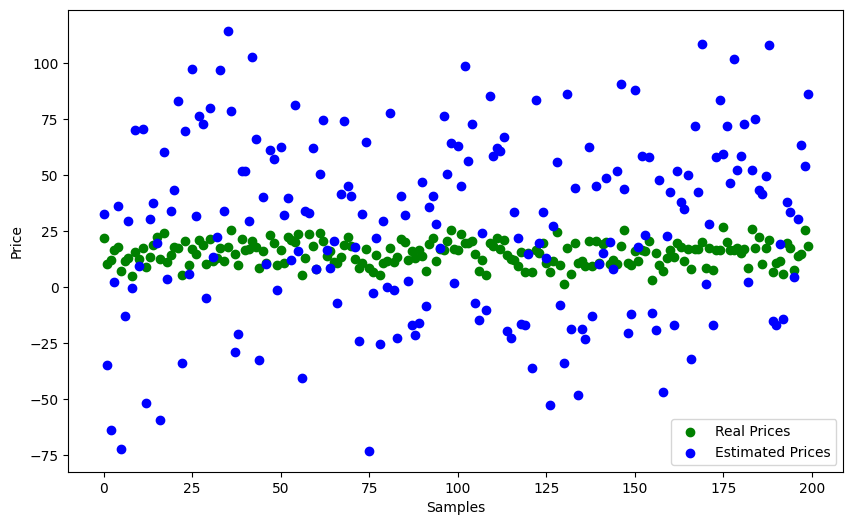

In [120]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(prices, c='green')
# plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()

In [121]:
def calculate_mse(y_true, y_pred):
    return np.mean((np.array(y_true) - np.array(y_pred))**2)

def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(np.array(y_true) - np.array(y_pred)))

sorted_population = sorted(population, key=compute_fitness)
theta = np.array(sorted_population[-1])
estimated_prices = []
for feature in features_X:
        predict_price = theta.dot(feature)
        estimated_prices.append(predict_price)
    # Tính MSE và MAE
mse = calculate_mse(sales_Y, estimated_prices)
mae = calculate_mae(sales_Y, estimated_prices)

    # In kết quả
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 1476.9261724433059
Mean Absolute Error (MAE): 31.76097012092168
